# Predicting Heart Disease Using Machine Learning


We are going to take the following approach
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

# 1. Problem Definition
Given clinical parameters about a patient can we predict whether or not a patient has heart disease


# 2. Data

The original data came from https://www.kaggle.com/competitions/heart-disease-uci/overview

Introduction
Spiritualist mediums claim to be able to communicate with the dead, they offer such services in exchange of some retribution (1). They will often sense that some person that died had some some sort of chest pain beforehand. According to WHO, the six most common causes of death are either heart or lung disease, excluding neonatal diseases (2). Are medium really able to access a different plane of the universe or are they intuitively good at Bayesian statistics?

Heart diseases are the leading cause of death globally. Each year, 17.9 million deaths occur, that is one death every other second. One third of these deaths occur below the age of 70 (3). A lot of effort is provided by researchers all over the world to provide prevention, help, relieve, and hopefully one day cure heart diseases. Carmat, a french company, just received approval in December 2020 to sell their artificial heart in Europe (4).

The data
The dataset named "Cleveland Heart Disease Dataset" comes from a study conducted in 1988 and originates from the UCI Machine Learning Repository. The dataset was split in two: a training and a testing set. The task is to get the best predictor and guess if a patient has a heart disease.

Features
The dataset is provided in the same format we have gotten it. Often the data needs to be cleaned and formatted, this step has already taken care of by the providers of the dataset. No column names appear in the original dataset, so you will need to add them on your own.

# 3. Evaluation

If we can reach 95% accuracy of predicting whether or not a patient has heart disease, then we will pursue the project

# 4. Features

There are 14 columns:

* age. The age of the patient.
* sex. The gender of the patient. (1 = male, 0 = female).
* cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
* trestbps. Resting blood pressure in mmHg.
* chol. Serum Cholestero in mg/dl.
* fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
* restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
* thalach. Max heart rate achieved.
* exang. Exercise induced angina (1 = yes, 0 = no).
* oldpeak. ST depression induced by exercise relative to rest.
* slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
* ca. Number of major vessels (0–3) colored by flourosopy.
* thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
* num. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

# Preparing the tools

We are going to use pandas, matplotlib and Numpy for data analysis and manipulation

In [48]:
# For Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Model evaluation
from sklearn.model_selection import train_test_split,cross_val_score,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report,plot_roc_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 2. Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")

# Exploring Data

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.shape

(303, 14)

In [6]:
df.isna().values.any()

False

In [7]:
df.duplicated().values.any()

True

## 3. Evaluation 

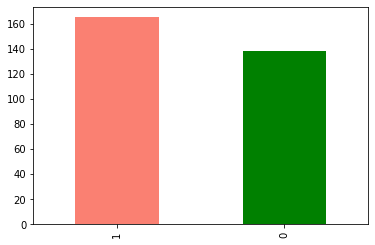

In [8]:
df.target.value_counts().plot(kind="bar",color=["salmon","green"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Heart Disease Frequency According to Sex

In [10]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


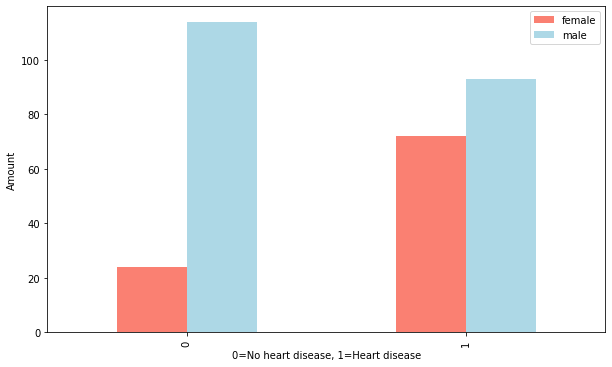

In [11]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.ylabel("Amount")
plt.xlabel("0=No heart disease, 1=Heart disease")
plt.legend(["female","male"]);

# Age vs Max Heart Rate (Thalach) in Heart disease

## 5. Modelling

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Split data into target and features

In [13]:
X = df.drop("target",axis=1)
y = df.target

Split data into train and test sets

In [14]:
np.random.seed = 42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

Some evaluation Functions

In [15]:
models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

In [16]:
def train_val_test(data):
    np.random.seed = 42
    shuffled_data = data.sample(frac=1)
    X = shuffled_data.drop("target",axis=1)
    y = shuffled_data.target
    train_split = round(0.7*len(shuffled_data))
    valid_split = round(train_split+0.15*len(shuffled_data))
    X_train,y_train = X[:train_split],y[:train_split]
    X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
    X_test,y_test = X[valid_split:],y[valid_split:]
    return X_train,y_train,X_valid,y_valid,X_test,y_test

In [17]:
def evaluate(name , y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds,average="micro")
    f1 = f1_score(y_true,y_preds,average="micro")
    metrics = {"accuracy_score":accuracy,"precision_score":precision,"f1_score":f1}
    print(f"The accuracy score for {name} is {round(accuracy,2)*100:.2f}%")
    print(f"The precision score for {name} is {round(precision,2)*100:.2f}%")
    print(f"The f1 score for {name} is {round(f1,2)*100:.2f}%")
    return metrics


In [61]:
def evaluate_CV(data,clf):
    np.random.seed = 42
    shuffled_data = data.sample(frac=1)
    X = shuffled_data.drop("target",axis=1)
    y = shuffled_data.target
    cv_accuracy = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
    print(f"Accuracy score for cross_validation is {np.mean(cv_accuracy)*100:.2f}")
    cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
    print(f"Precision score for cross validation is {np.mean(cv_precision)*100:.2f}")
    cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
    print(f"Recall score for cross validation is {np.mean(cv_recall)*100:.2f}")
    cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
    print(f"F1 score for cross validation is {np.mean(cv_recall)*100:.2f}")
    cv_metrics = {"Accuracy":np.mean(cv_accuracy),"Precision":np.mean(cv_precision),"Recall":np.mean(cv_recall),"F1":cv_f1}
    return cv_metrics

In [19]:
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models
    
    """
    np.random.seed = 42
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
        y_preds = model.predict(X_test)
        evaluate(name,y_test,y_preds)
    return model_scores 

We'll train the data on different models and test it on the test set

In [20]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

The accuracy score for Logistic Regression is 80.00%
The precision score for Logistic Regression is 80.00%
The f1 score for Logistic Regression is 80.00%
The accuracy score for KNN is 61.00%
The precision score for KNN is 61.00%
The f1 score for KNN is 61.00%
The accuracy score for Random Forest is 79.00%
The precision score for Random Forest is 79.00%
The f1 score for Random Forest is 79.00%


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


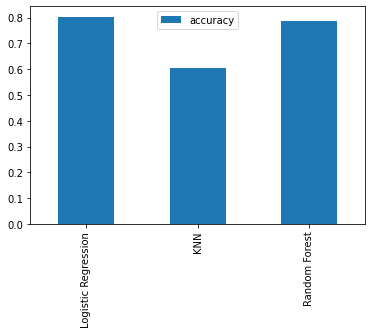

In [21]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Lets look at the following
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* cross-validation
* precision 
* Recall
* F1 score
* Classification report
* Roc curve

## Hyperparameter tuning


In [22]:
#Let's tune KNN

train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

In [23]:
train_scores

[1.0,
 0.8264462809917356,
 0.8140495867768595,
 0.7933884297520661,
 0.7933884297520661,
 0.756198347107438,
 0.731404958677686,
 0.7272727272727273,
 0.7396694214876033,
 0.7231404958677686,
 0.7272727272727273,
 0.731404958677686,
 0.7231404958677686,
 0.7272727272727273,
 0.7396694214876033,
 0.71900826446281,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.6983471074380165]

In [24]:
test_scores

[0.5081967213114754,
 0.45901639344262296,
 0.5737704918032787,
 0.5409836065573771,
 0.6065573770491803,
 0.5409836065573771,
 0.639344262295082,
 0.5737704918032787,
 0.6229508196721312,
 0.6065573770491803,
 0.5901639344262295,
 0.6229508196721312,
 0.6065573770491803,
 0.5901639344262295,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.6065573770491803,
 0.6065573770491803]

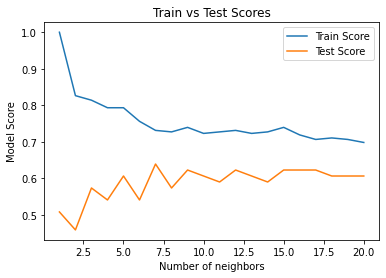

In [25]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.title("Train vs Test Scores")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend();

In [26]:
# Let's tune Logistic Regression

clf = LogisticRegression()
logic_grid = {"solver" : ['lbfgs','liblinear'],
        "penalty" : ["none","l1", "l2"],
       "C":np.logspace(-4,4,20)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rs_clf = RandomizedSearchCV(clf,logic_grid,cv=cv,n_iter=10,verbose=2)
rs_clf.fit(X_train,y_train)



Fitting 30 folds for each of 10 candidates, totalling 300 fits
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0002

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.088586

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th


[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.6158482110660

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV]

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT


[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is not supported for the liblinear solve

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['none', 'l1', 'l2'],
                                        'solver': ['lbfgs', 'liblinear']},
                   verbose=2)

In [27]:
rs_clf.best_score_

0.8413333333333334

In [28]:
rs_clf.best_estimator_

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [29]:
gs_clf = GridSearchCV(clf,logic_grid,cv=cv,verbose=2)
gs_clf.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Fitting 30 folds for each of 120 candidates, totalling 3600 fits
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0001

[CV] END .................C=0.0001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=none, solver=liblinear;

[CV] END .C=0.00026366508987303583, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.00026366508987303583, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.00026366508987303583, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.00026366508987303583, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.00026366508987303583, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.00026366508987303583, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.00026366508987303583, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.00026366508987303583, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.00026366508987303583, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.00026366508987303583, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.00026366508987303583, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.00026366508987303583, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.00026366508987

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=none, solver=liblinear; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result


[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006951927961775605, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] EN

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.001

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result


[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0018329807108324356, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV]

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=none, solver=liblinear; total time=   0.0s
[CV]

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result


[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.012742749857031334, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.012742749857031334, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01274274

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT


[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.03359818286283781, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=none, solver=liblinear; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.03359818286283781, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=none, solver=liblinear; total time=   0.0s
[CV]

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.033598182862837

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.033598182862837

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.08858667904100823, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=none, solver=liblinear; total time=   0.0s
[CV] END

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.088586679041008

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.088586679041008

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.23357214690901212, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=none, solver=liblinear; total time=   0.0s
[CV] END

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.233572146909012

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result


[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.6158482110660

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.623776739188721, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ......C=1.623776739188721, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ......C=1.623776739188721, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.6237767391887

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ....C=4.281332398719396, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=4.281332398719396, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=4.2813323987193

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT


[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=11.288378916846883, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=11.2883789168468

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=29.76351441631

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ...C=29.763514416313132, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=29.7635144163131

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=78.47599703514607, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.475997035146

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=78.47599703514607, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=78.475997035146

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=206.913808111479, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=206.913808111479, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=206.913808111479, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=206.913808111479, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=206.913808111479, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=206.913808111479

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result


[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result


[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=545.5594781168514, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=545.5594781168514, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=545.5594781168514, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=545.5594781168514, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=545.5594781168514, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=545.5594781168514, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=545.55947811685

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT


[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=1438.44988828766, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1438.44988828766, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1438.44988828766, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1438.44988828766, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1438.44988828766, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1438.44988828766, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1438.44988828766

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.449888287

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.449888287

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.449888287

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3792.690190732246, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END C=3792.690190732246, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.6901907322

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.6901907322

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..............C=10000.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..........C=10000.0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..........C=10000.0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..........C=10000.0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..........C=10000.0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..........C=10000.0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..........C=10000.0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..........C=10000.0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..........C=10000.0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..........C=10000.0

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is not supported for the liblinear s

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['none', 'l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             verbose=2)

In [30]:
gs_clf.best_score_

0.8468333333333332

In [31]:
gs_clf.best_estimator_

LogisticRegression(C=29.763514416313132)

## Let's Tune Random Forest Classifier

In [32]:
#Let's tune hyperparameters of RandomForestClassifier
random_grid = {"n_estimators":[100,200,300,400],
           "max_depth":[None,2],
           "max_features":["auto","sqrt"],
           "min_samples_split":[2,6]}
clf = RandomForestClassifier(n_jobs=-1)
random_rs_clf = RandomizedSearchCV(clf,random_grid,n_iter=10,cv=5,verbose=2)
random_rs_clf.fit(X_train,y_train)
print(random_rs_clf.best_score_)
random_gs_clf = GridSearchCV(clf,random_grid,cv=5,verbose=2)
random_gs_clf.fit(X_train,y_train)
print(random_gs_clf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=auto, min_samples_split=6, n_estimators=200; total time=   3.2s
[CV] END max_depth=None, max_features=auto, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END max_depth=2, max_feature

[CV] END max_depth=None, max_features=auto, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=6, n_estimators=400;

[CV] END max_depth=2, max_features=auto, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_split=6, n_estimators=400; total time=   0.4s
[CV] END max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END m

In [33]:
random_gs_clf.best_score_

0.8513605442176871

In [34]:
random_gs_clf.best_score_

0.8513605442176871

In [35]:
model_score = pd.DataFrame({"LogisticRegression":[gs_clf.best_score_,rs_clf.best_score_],"RandomForestClassifier":[random_gs_clf.best_score_,random_rs_clf.best_score_]},index=["GridSearchCV","RandomizedsearchCV"])

In [36]:
model_score

,LogisticRegression,RandomForestClassifier
GridSearchCV,0.846833,0.851361
RandomizedsearchCV,0.841333,0.851361


Hyperparameter tuning of Our RandomForestClassifier with RandomizedSearchCV and GridSearchCV

In [37]:
grid = {"n_estimators":[100,200,300,400,500],
           "max_depth":[None,2,4,6],
           "max_features":["auto","sqrt"],
           "min_samples_split":np.arange(1,10,2),
           "min_samples_leaf":np.arange(1,10,2)}
clf = RandomForestClassifier(n_jobs=-1)
rs_clf = RandomizedSearchCV(clf,grid,cv=5,n_iter=10,verbose=2)
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 2, 4, 6],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([1, 3, 5, 7, 9]),
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [38]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 9,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 4}

In [39]:
rs_clf.best_score_

0.8514455782312925

In [40]:
grid = {"n_estimators":[100,200,400,500],
           "max_depth":[None,2],
           "max_features":["auto"],
           "min_samples_split":np.arange(1,10,4),
           "min_samples_leaf":np.arange(1,10,4)}

In [41]:
gs_clf = GridSearchCV(clf,grid,cv=5,verbose=2)
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   3.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   3.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   3.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   3.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   3.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   3.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1,

[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=200; total time=   3.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=200; total time=   4.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=200; total time=   3.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=400; total time=   3.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=400; total time=   3.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=400; total time=   3.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=400; total time=   3.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=400; total time=   3.9s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=1, n_estimators=500; total time=   3.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=1, n_estimators=500; total time=   3.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=1, n_estimators=500; total time=   3.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=1, n_estimators=500; total time=   3.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=1, n_estimators=500; total time=   3.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None,

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_sam

[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_sam

[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=200; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=200; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=200; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=200; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=200; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=400; total time=   0.4s
[CV] END max_depth=2, max_features=auto, min_sam

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "D:\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "D:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "D:\Anacond

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 2], 'max_features': ['auto'],
                         'min_samples_leaf': array([1, 5, 9]),
                         'min_samples_split': array([1, 5, 9]),
                         'n_estimators': [100, 200, 400, 500]},
             verbose=2)

In [42]:
gs_clf.best_score_

0.8511904761904763

## Evaluating The Model

We'll use the Random Forest GridSearchCv model to evaluate

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1

In [47]:
y_preds = gs_clf.predict(X_test)
evaluate("Random Forest Classification model",y_test,y_preds)

The accuracy score for Random Forest Classification model is 74.00%
The precision score for Random Forest Classification model is 74.00%
The f1 score for Random Forest Classification model is 74.00%


{'accuracy_score': 0.7377049180327869,
 'precision_score': 0.7377049180327869,
 'f1_score': 0.7377049180327869}

# Plot ROC Curve and Calculate

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


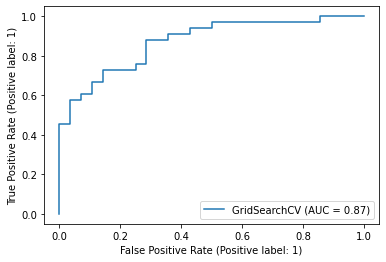

In [50]:
plot_roc_curve(gs_clf,X_test,y_test)

In [51]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 

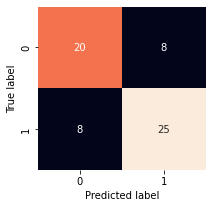

In [52]:
plot_conf_mat(y_test,y_preds)

# Evaluating our model with Cross validation 

In [54]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 9,
 'min_samples_split': 9,
 'n_estimators': 100}

In [55]:
clf = RandomForestClassifier(max_depth= None,max_features= 'auto',min_samples_leaf= 9,min_samples_split= 9,n_estimators = 100)

In [62]:
cv_metrics = evaluate_CV(df,clf)

Accuracy score for cross_validation is 83.19
Precision score for cross validation is 83.33
Recall score for cross validation is 88.48
F1 score for cross validation is 88.48


In [77]:
df_cv = pd.DataFrame(cv_metrics)
df_cv  = df_cv.T
df_cv.drop(range(1,5,1),axis=1,inplace=True)

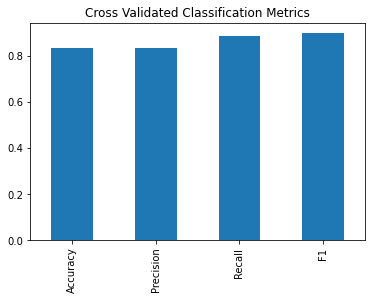

In [81]:
df_cv.plot.bar(title="Cross Validated Classification Metrics",legend=False);

# Feature Importance

Let's find out which features are most important for our machine learning model

In [82]:
clf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=9, min_samples_split=9)

In [84]:
clf.feature_importances_

array([0.04607384, 0.02355743, 0.17647175, 0.0238959 , 0.02316826,
       0.00029152, 0.00631935, 0.14559461, 0.11145554, 0.08533599,
       0.06116609, 0.11854077, 0.17812896])

In [87]:
feature_dict = dict(zip(df.columns,list(clf.feature_importances_)))

In [88]:
feature_dict

{'age': 0.04607383802198459,
 'sex': 0.023557428703299813,
 'cp': 0.17647175121611092,
 'trestbps': 0.023895895722833512,
 'chol': 0.023168256735719442,
 'fbs': 0.00029152012939283653,
 'restecg': 0.0063193512189526225,
 'thalach': 0.14559461068862667,
 'exang': 0.11145553824697033,
 'oldpeak': 0.08533598810316109,
 'slope': 0.06116609170852888,
 'ca': 0.11854077207005688,
 'thal': 0.17812895743436247}

<AxesSubplot:title={'center':'Feature Importances'}>

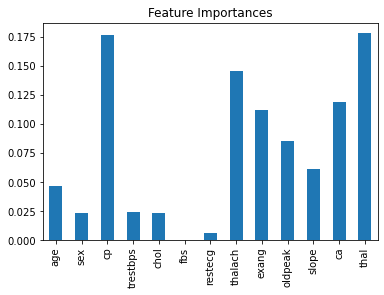

In [91]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importances",legend=False)